# Neural Network Regression

## What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
    * X: features/data (inputs)
    * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
        * Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
    * Visualizng the model ("visualize, visualize, visualize")
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

## Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

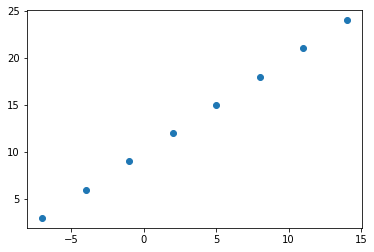

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
X[0].shape, y[0].shape

((), ())

In [4]:
X[0], y[0]

(-7.0, 3.0)

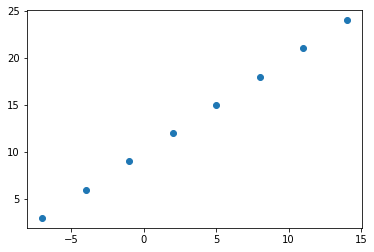

In [5]:
# Turn X and y into tensors
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [6]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
# Take a single example of X (model.fit works with numpy array as well)
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [8]:
# Set random seed
tf.random.set_seed(42)


# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ["mae"])

# Fit the model
#model.fit(X, y, epochs=5)  # this will break with TensorFlow 2.7.0+

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 910ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Add one dimension which is inner most
tf.expand_dims(X, axis=-1)  # Adds one dimensions at the end(inner most dimension)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [10]:
# One more dimension is added
X.shape, tf.expand_dims(X, axis=-1).shape

(TensorShape([8]), TensorShape([8, 1]))

In [11]:
# In some versions of TensorFlow, we might require float64

# Cast to float64
X = tf.cast(tf.constant(X), dtype="float64")
y = tf.cast(tf.constant(y), dtype="float64")

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

* **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
* **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


various options you can use to improve a neural network model There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [12]:
# Improving the model by increasing the epochs

# First Create the Sequence and then add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 709ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [13]:
# Make Prediction using Model
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [14]:
# See the biases and Weights of the layer 1(the only layer)
print("Weights : ",model.layers[0].get_weights()[0])
print("Biases : ", model.layers[0].get_weights()[1])

Weights :  [[1.7008739]]
Biases :  [0.8249995]


In [15]:
# Predict it with weights and biases

1.0217066 * 17.0 + 9.962534

27.3315462

In [16]:
# Improving the model by changing the Optimizer

# First Create the Sequence and then add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics= ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 831ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5691 - mae: 10.5691
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5646 - mae: 10.5646
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5601 - mae: 10.5601
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5556 - mae: 10.5556
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5511 - mae: 10.5511
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5466 - mae: 10.5466
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5421 - mae: 10.5421
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5376 - mae: 10.5376
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5331 - mae: 10.5331
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 5ms/step - loss: 10.1866 - mae: 10.1866
Epoch 88/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1821 - mae: 10.1821
Epoch 89/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1776 - mae: 10.1776
Epoch 90/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1731 - mae: 10.1731
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1686 - mae: 10.1686
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1641 - mae: 10.1641
Epoch 93/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1596 - mae: 10.1596
Epoch 94/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1551 - mae: 10.1551
Epoch 95/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1506 - mae: 10.1506
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1461 - mae: 10.1461
Epoch 97/100
1/1 [==============================] - 0s 6ms

In [17]:
# Improving the model by adding hidden layer/activation layer

# First Create the Sequence and then add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 765ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 0

In [18]:
model.layers[0].get_weights()[0]

array([[ 2.61212677e-01, -8.03425163e-02, -2.09173420e-04,
        -7.81371519e-02, -1.21386983e-01, -1.08752167e-04,
         1.30758554e-01,  3.14059779e-02, -3.83749418e-02,
         3.68519872e-01,  2.54075438e-01, -6.25823885e-02,
         3.85899425e-01, -2.23256171e-01,  1.37326298e-02,
        -1.71171024e-01,  2.10863933e-01, -7.16423430e-03,
        -2.23240796e-02,  1.72199726e-01, -1.54933613e-03,
        -1.59216017e-01, -2.43976310e-01,  6.73253089e-06,
        -6.69135712e-04, -9.43104997e-02,  4.57427576e-02,
         3.63957673e-01,  1.54667422e-01,  1.25781521e-01,
         1.20955341e-01, -1.71127498e-01, -4.70626615e-02,
         2.53377169e-01, -6.01241216e-02,  1.42727420e-01,
        -2.50803381e-01,  3.06323737e-01, -1.20638870e-05,
        -2.20094889e-01, -1.74710359e-02, -1.85169950e-01,
        -1.03852682e-01,  2.35911787e-01,  6.37538135e-02,
         3.34798060e-02,  9.71878693e-02,  2.07609817e-01,
        -2.68734366e-01, -1.80952892e-01,  1.67067558e-0

In [19]:
model.layers[0].get_weights()[1]

array([ 0.07622829,  0.0032176 , -0.00424582,  0.04201979,  0.01810577,
       -0.00856633,  0.03656131, -0.02078604, -0.04085802,  0.0976724 ,
        0.08701775, -0.02339187,  0.10938033,  0.02717014, -0.00625416,
        0.04282103,  0.05572517, -0.00291859,  0.00370028,  0.00757574,
       -0.01163263, -0.02500253,  0.01120459, -0.00143632, -0.00510395,
        0.04130499, -0.02171025,  0.08784226,  0.06589963, -0.02808041,
       -0.01505954, -0.01256951,  0.0162304 ,  0.0643148 ,  0.03727233,
       -0.00778267,  0.0265603 ,  0.07277479, -0.00651241,  0.03477424,
       -0.00389925,  0.05062972,  0.0248084 ,  0.09374256, -0.03021521,
       -0.04523477, -0.02482447,  0.08994121,  0.03804594, -0.02942741,
        0.01553281, -0.01652098,  0.08884637,  0.03844718, -0.01866312,
       -0.01799813, -0.01223571,  0.02320055,  0.03855195,  0.01709758,
        0.04282609,  0.00420174, -0.03033335, -0.0449276 , -0.0334111 ,
       -0.03282231, -0.01506338,  0.01999294,  0.02384784, -0.00

In [20]:
# Seems like our model is overfitting the data too much

model.predict([17.0])

array([[31.727648]], dtype=float32)

### Common ways  to improve a deep model

* **Adding layers**
* **Increasing the number of hidden units**
* **Change the activation function**
* **Change the optimizer**
* **Change the Learning rate**
* **Fitting for more data**
* **Fitting for longer**

In [21]:
# Improving the model by adding just the hidden layer without activation function
# Reducing number of hidden units

# First Create the Sequence and then add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 719ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8093 - mae: 12.8093
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2911 - mae: 12.2911
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7680 - mae: 11.7680
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2372 - mae: 11.2372
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6959 - mae: 10.6959
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1416 - mae: 10.1416
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.5711 - mae: 9.5711
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3704 - mae: 8.3704
Epoch 11/100
1/1 [==============================] - 0s 8ms/s

In [22]:
model.predict([17.0])

array([[27.75227]], dtype=float32)

In [23]:
# Improving the model by changing the optimization

# First Create the Sequence and then add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics= ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.8549 - mae: 11.8549
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.7827 - mae: 11.7827
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 11.7104 - mae: 11.7104
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 11.6381 - mae: 11.6381
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 11.5658 - mae: 11.5658
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 11.4934 - mae: 11.4934
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 11.4209 - mae: 11.4209
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3483 - mae: 11.3483
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 11.2757 - mae: 11.2757
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2030 - mae: 11.2030
Epoch 11/100
1/1 [==============================] -

In [24]:
model.predict([17.0])

array([[31.317047]], dtype=float32)

In [25]:
# Improving the model by changing the Learning Rate

# First Create the Sequence and then add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.01),
             metrics= ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 734ms/step - loss: 14.2190 - mae: 14.2190
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5222 - mae: 13.5222
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8277 - mae: 12.8277
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1351 - mae: 12.1351
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4431 - mae: 11.4431
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7496 - mae: 10.7496
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0519 - mae: 10.0519
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.3466 - mae: 9.3466
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6305 - mae: 8.6305
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.9001 - mae: 7.9001
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss

In [27]:
model.predict([17.0])

array([[26.675222]], dtype=float32)

## Evaluating a Model

A typical workflow you'll go through when building neural networks is:

**Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...**

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.



**Note:** Hyperparameter are the things that we can tweak during model fitting, while parameters are the things while fiiting the model, which the model learns itself, which we cannot tweak.

### Visualise

When it comes to evaluate, its better to visualize

* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [28]:
# Make bigger Datasets
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [29]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [31]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).


For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.


In [32]:
# Check how many samples we have
len(X)

50

In [33]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualize the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

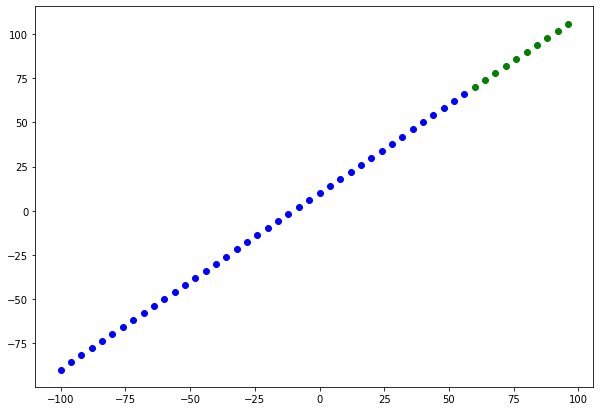

In [34]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c='b', label='Training data')

plt.scatter(X_test, y_test, c='g', label='Testing Data')

plt.show()

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [35]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

# Fit the model
#model.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

## Visualizing the Model

In [36]:
#model.summary()

In [37]:
# Let's create a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape =  [1])  # Define the input shape to our model
])


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

In [38]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Dense layer means fully connected layer

In [39]:
tf.expand_dims(X_train, -1)[0].shape  # the input shape should be 1

TensorShape([1])

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [40]:
# Fit the model to training data
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [41]:
from tensorflow.keras.utils import plot_model

In [40]:
plot_model(model = model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Naming the layers and models

In [42]:
# Let's create a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape =  [1], name = "input_layer"),  # Define the input shape to our model
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model 1")


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

In [43]:
model.summary()

Model: "model 1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Visualizing the Predictions

* To visualize predictions, it's always a good idea to plot them against the ground truth labels.

* Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

* First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [44]:

# First Create the Sequence and then add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))


# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.01),
             metrics= ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [45]:
# Make prediction
y_preds = model.predict(tf.expand_dims(X_test, -1))

In [46]:
y_preds

array([[ 69.05404 ],
       [ 72.99317 ],
       [ 76.93228 ],
       [ 80.87139 ],
       [ 84.810524],
       [ 88.74965 ],
       [ 92.68877 ],
       [ 96.62789 ],
       [100.56702 ],
       [104.50614 ]], dtype=float32)

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [48]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

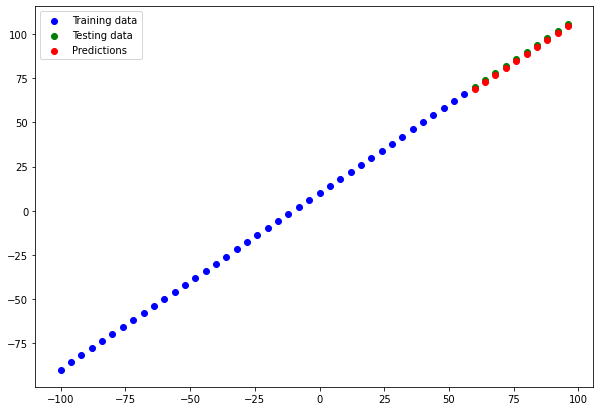

In [49]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [50]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 312ms/step - loss: 1.2199 - mae: 1.2199


[1.2199127674102783, 1.2199127674102783]

In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [51]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=y_preds)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.945961, 15.605463, 13.040631, 11.251444, 10.237895, 10.      ,
       10.537753, 11.851156, 13.94021 , 16.804913], dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [52]:
# Check the albel tensor value
print(y_test)
y_test

tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [53]:
# Check the predictions tensor values (notice the extra square brackets)
print(type(y_preds))
y_preds

<class 'numpy.ndarray'>


array([[ 69.05404 ],
       [ 72.99317 ],
       [ 76.93228 ],
       [ 80.87139 ],
       [ 84.810524],
       [ 88.74965 ],
       [ 92.68877 ],
       [ 96.62789 ],
       [100.56702 ],
       [104.50614 ]], dtype=float32)

In [54]:
# Check the tensor shapes
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using squeeze(), it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

🔑 **Note**: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [55]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [56]:
# Shhape after squeeze()
y_preds.squeeze().shape

(10,)

In [57]:
# What do they look like?
y_test, y_preds.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 array([ 69.05404 ,  72.99317 ,  76.93228 ,  80.87139 ,  84.810524,
         88.74965 ,  92.68877 ,  96.62789 , 100.56702 , 104.50614 ],
       dtype=float32))

Okay, now we know how to make our y_test and y_preds tenors the same shape, let's use our evaluation metrics."

In [58]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.2199128>

In [59]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [63]:
# Fucntions

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.

**Build model_1**

In [60]:
# Set random seed
tf.random.set_seed(42)

# Repicate the orginal model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

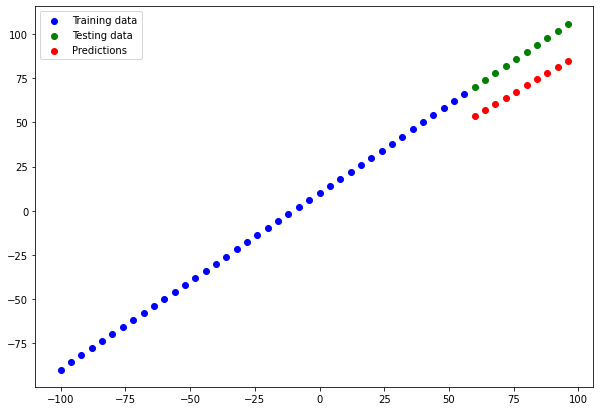

In [61]:
# Make prediction and plor prediction
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [64]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()

mae_1, mse_1

(18.745327, 353.57336)

In [65]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_1.weights[0].numpy()

array([[0.8713099]], dtype=float32)

In [67]:
model_1.weights[1].numpy()

array([1.2924998], dtype=float32)

In [68]:
model_1.layers[0].get_weights()[0]

array([[0.8713099]], dtype=float32)

**Build model_2**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [69]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose t

In [70]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [76]:
model_2.layers[0].weights[0].numpy()

array([[ 0.2818765 , -0.05931674,  0.23022771, -0.22770092, -0.18401685,
         0.4626208 ,  0.55024564,  0.4963325 , -0.33856735, -0.18170239]],
      dtype=float32)

In [74]:
model_2.layers[1].weights[0].numpy()

array([[ 0.28547657],
       [-0.06006661],
       [ 0.23325726],
       [-0.23063993],
       [-0.18625344],
       [ 0.46855634],
       [ 0.557299  ],
       [ 0.50264543],
       [-0.34286737],
       [-0.18396898]], dtype=float32)

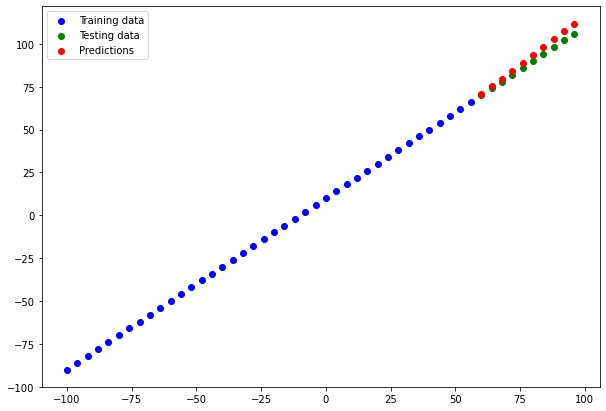

In [77]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [78]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.19694, 13.070127)

**Build model_3**

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [79]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500) # set verbose t

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/500
2/2 [==============================] - 0s 2ms/st

2/2 [==============================] - 0s 6ms/step - loss: 22.5890 - mae: 22.5890
Epoch 174/500
2/2 [==============================] - 0s 6ms/step - loss: 11.3498 - mae: 11.3498
Epoch 175/500
2/2 [==============================] - 0s 7ms/step - loss: 20.0652 - mae: 20.0652
Epoch 176/500
2/2 [==============================] - 0s 7ms/step - loss: 7.4087 - mae: 7.4087
Epoch 177/500
2/2 [==============================] - 0s 7ms/step - loss: 8.5979 - mae: 8.5979
Epoch 178/500
2/2 [==============================] - 0s 5ms/step - loss: 15.4691 - mae: 15.4691
Epoch 179/500
2/2 [==============================] - 0s 9ms/step - loss: 9.3099 - mae: 9.3099
Epoch 180/500
2/2 [==============================] - 0s 4ms/step - loss: 8.1326 - mae: 8.1326
Epoch 181/500
2/2 [==============================] - 0s 7ms/step - loss: 18.6995 - mae: 18.6995
Epoch 182/500
2/2 [==============================] - 0s 7ms/step - loss: 10.7752 - mae: 10.7752
Epoch 183/500
2/2 [==============================] - 0s 8ms/st

2/2 [==============================] - 0s 5ms/step - loss: 11.6931 - mae: 11.6931
Epoch 344/500
2/2 [==============================] - 0s 5ms/step - loss: 10.6911 - mae: 10.6911
Epoch 345/500
2/2 [==============================] - 0s 12ms/step - loss: 30.9080 - mae: 30.9080
Epoch 346/500
2/2 [==============================] - 0s 5ms/step - loss: 10.6418 - mae: 10.6418
Epoch 347/500
2/2 [==============================] - 0s 5ms/step - loss: 25.5682 - mae: 25.5682
Epoch 348/500
2/2 [==============================] - 0s 3ms/step - loss: 13.2760 - mae: 13.2760
Epoch 349/500
2/2 [==============================] - 0s 6ms/step - loss: 13.0389 - mae: 13.0389
Epoch 350/500
2/2 [==============================] - 0s 5ms/step - loss: 15.4016 - mae: 15.4016
Epoch 351/500
2/2 [==============================] - 0s 6ms/step - loss: 32.8786 - mae: 32.8786
Epoch 352/500
2/2 [==============================] - 0s 12ms/step - loss: 14.0887 - mae: 14.0887
Epoch 353/500
2/2 [==============================] -

Epoch 429/500
2/2 [==============================] - 0s 6ms/step - loss: 12.0960 - mae: 12.0960
Epoch 430/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0939 - mae: 11.0939
Epoch 431/500
2/2 [==============================] - 0s 7ms/step - loss: 10.0177 - mae: 10.0177
Epoch 432/500
2/2 [==============================] - 0s 7ms/step - loss: 13.3635 - mae: 13.3635
Epoch 433/500
2/2 [==============================] - 0s 5ms/step - loss: 11.3840 - mae: 11.3840
Epoch 434/500
2/2 [==============================] - 0s 6ms/step - loss: 30.4181 - mae: 30.4181
Epoch 435/500
2/2 [==============================] - 0s 8ms/step - loss: 10.5025 - mae: 10.5025
Epoch 436/500
2/2 [==============================] - 0s 6ms/step - loss: 28.9030 - mae: 28.9030
Epoch 437/500
2/2 [==============================] - 0s 6ms/step - loss: 8.6078 - mae: 8.6078
Epoch 438/500
2/2 [==============================] - 0s 5ms/step - loss: 12.7370 - mae: 12.7370
Epoch 439/500
2/2 [=======================

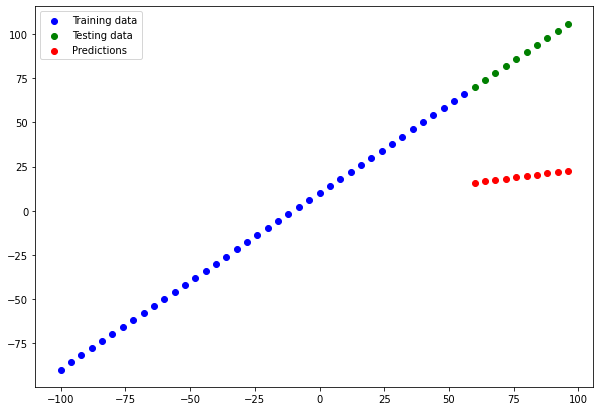

In [80]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

The **Stocatsic Gradient Descent** is not able to find the **Global Minima**, its jumping over the **Global Minima** and is not able to find it. We can decrease the **learning rate** and increase the **epochs** to get better predictions.

Or just change the **Optimizer**.

In [81]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68784, 4804.469)

## Comapring Results

In [82]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [83]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.687843,68.687843


 From our experiments, it looks like model_2 performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments


One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving our models

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. **The SavedModel format (default)**.
2. **The HDF5 format**.


The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [84]:
# Save a model using the SaveModel format

model_2.save('best_model_SaveModel_format')

INFO:tensorflow:Assets written to: best_model_SaveModel_format\assets


In [85]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SaveModel_format

assets
keras_metadata.pb
saved_model.pb
variables


In [86]:
# Save a model using the HDF5 format

model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [87]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


## Loading a Model

We can load a saved model using the **load_model()** method

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [88]:
loaded_saved_model = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_saved_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Compare model_2 predictions with SavedModel format Predictions

model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)

mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

Loading model from HDF5

In [90]:
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Comparing the model_2 prediction with loaded HDF5 predictions
h5_model_pred = loaded_h5_model.predict(X_test)

In [93]:
h5_model_pred == model_2.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [94]:
# Comparing the mean squared error
mae(y_test, h5_model_pred.squeeze()).numpy() == mae(y_test, h5_model_pred.squeeze()).numpy()

True

In [95]:
h5_model_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [96]:
h5_model_pred.squeeze()  # reduces the dimension

array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)

In [97]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

## A Large example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, **age, sex, bmi, children, smoking_status** and **residential_region**.

In [98]:
# Import the Required Libraries

import tensorflow as tf
import pandas as pd
import numpy as np

In [99]:
# Read the Insurance Dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [100]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [102]:
# Turn all categories into number
insurance_one_hot = pd.get_dummies(insurance) #, drop_first=True)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [103]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [104]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [105]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random st

In [106]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics = ['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7537.0942 - mae: 7537.0942
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7514.6177 - mae: 7514.6177
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7694.1343 - mae: 7694.1343
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7595.9141 - mae: 7595.9141
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7735.9126 - mae: 7735.9126

In [136]:
# Check the results of Insurance Model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.2520 - mae: 8628.2520


[8628.251953125, 8628.251953125]

In [138]:
# Comapre the loss with mean and median
y_train.median() , y_train.mean()

(9575.4421, 13346.089736364489)

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [141]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100) , #activation="relu"),  # 100 units
    tf.keras.layers.Dense(10),                      # 10 units
    tf.keras.layers.Dense(1)                        # 1 units (important for output)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),  # SGD doesn't work
                       metrics = ['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/100
34/34 [==============================] - 0s 985us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0815 - ma

34/34 [==============================] - 0s 2ms/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 5600.6650 - mae: 5600.6650
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 5559.4326 - mae: 5559.4326
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 5523.6191 - mae: 5523.6191
Epo

In [107]:
# Check the results of Insurance Model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2520 - mae: 8628.2520


[8628.251953125, 8628.251953125]

In [108]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # 100 units
    tf.keras.layers.Dense(10),                      # 10 units
    tf.keras.layers.Dense(1)                        # 1 units (important for output)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(0.01),  # SGD doesn't work
                       metrics = ['mae'])

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12255.0576 - mae: 12255.0576
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7624.7441 - mae: 7624.7441
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7308.0225 - mae: 7308.0225
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7133.7031 - mae: 7133.7031
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6938.4385 - mae: 6938.4385
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6718.6958 - mae: 6718.6958
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 6508.7764 - mae: 6508.7764
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 6362.2778 - mae: 6362.2778
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 6248.7173 - mae: 6248.7173
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 6098.0464 - mae: 6098.04

In [164]:
# Check the results of Insurance Model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1962.6758 - mae: 1962.6758


[1962.67578125, 1962.67578125]

<AxesSubplot:>

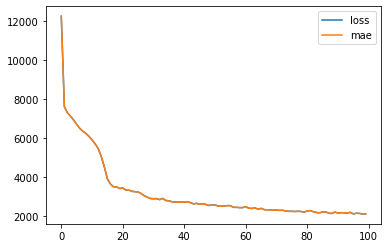

In [168]:
# Plot history (also known as a loss curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [169]:
history.history

{'loss': [12255.0576171875,
  7624.744140625,
  7308.0224609375,
  7133.703125,
  6938.4384765625,
  6718.69580078125,
  6508.7763671875,
  6362.27783203125,
  6248.71728515625,
  6098.04638671875,
  5920.4931640625,
  5715.07177734375,
  5478.1005859375,
  5069.61962890625,
  4536.64501953125,
  3920.76025390625,
  3654.47119140625,
  3512.678466796875,
  3513.0126953125,
  3426.9921875,
  3456.54443359375,
  3350.08837890625,
  3343.867919921875,
  3281.15771484375,
  3265.80224609375,
  3246.16552734375,
  3165.97900390625,
  3056.895751953125,
  2983.005615234375,
  2913.133056640625,
  2903.2109375,
  2908.41015625,
  2857.467041015625,
  2922.049560546875,
  2811.173583984375,
  2798.09765625,
  2747.813720703125,
  2735.170166015625,
  2731.713623046875,
  2733.058349609375,
  2722.392578125,
  2750.41015625,
  2702.29052734375,
  2640.8984375,
  2664.60986328125,
  2619.546875,
  2644.918212890625,
  2612.54150390625,
  2558.566162109375,
  2573.59130859375,
  2584.597900390625

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.


🤔 **Question: How long should you train for?**

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [170]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # 100 units
    tf.keras.layers.Dense(10),                      # 10 units
    tf.keras.layers.Dense(1)                        # 1 units (important for output)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(0.01),  # SGD doesn't work
                       metrics = ['mae'])

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs = 150)

Epoch 1/150
34/34 [==============================] - 0s 2ms/step - loss: 12255.0576 - mae: 12255.0576
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: 7624.7441 - mae: 7624.7441
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 7308.0225 - mae: 7308.0225
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 7133.7031 - mae: 7133.7031
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 6938.4385 - mae: 6938.4385
Epoch 6/150
34/34 [==============================] - 0s 2ms/step - loss: 6718.6958 - mae: 6718.6958
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 6508.7764 - mae: 6508.7764
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 6362.2778 - mae: 6362.2778
Epoch 9/150
34/34 [==============================] - 0s 1ms/step - loss: 6248.7173 - mae: 6248.7173
Epoch 10/150
34/34 [==============================] - 0s 1ms/step - loss: 6098.0464 - mae: 6098.04

In [109]:
# Check the results of Insurance Model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1962.6758 - mae: 1962.6758


[1962.67578125, 1962.67578125]

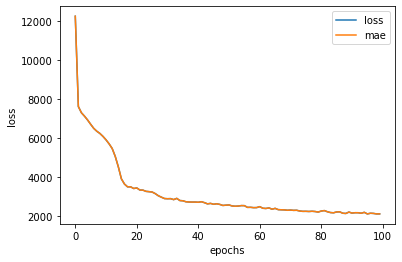

In [110]:
# Plot history (also known as a loss curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [111]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # 100 units
    tf.keras.layers.Dense(10),                      # 10 units
    tf.keras.layers.Dense(1)                        # 1 units (important for output)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(0.01),  # SGD doesn't work
                       metrics = ['mae'])

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 12255.0576 - mae: 12255.0576
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 7624.7441 - mae: 7624.7441
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7308.0225 - mae: 7308.0225
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7133.7031 - mae: 7133.7031
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 6938.4385 - mae: 6938.4385
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6718.6958 - mae: 6718.6958
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 6508.7764 - mae: 6508.7764
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 6362.2778 - mae: 6362.2778
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 6248.7173 - mae: 6248.7173
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 6098.0464 - mae: 6098.04

34/34 [==============================] - 0s 6ms/step - loss: 2080.3418 - mae: 2080.3418
Epoch 163/200
34/34 [==============================] - 0s 6ms/step - loss: 2052.1223 - mae: 2052.1223
Epoch 164/200
34/34 [==============================] - 0s 7ms/step - loss: 2066.4998 - mae: 2066.4998
Epoch 165/200
34/34 [==============================] - 0s 3ms/step - loss: 2066.2229 - mae: 2066.2229
Epoch 166/200
34/34 [==============================] - 0s 3ms/step - loss: 2058.9678 - mae: 2058.9678
Epoch 167/200
34/34 [==============================] - 0s 8ms/step - loss: 2061.3132 - mae: 2061.3132
Epoch 168/200
34/34 [==============================] - 0s 8ms/step - loss: 2070.8777 - mae: 2070.8777
Epoch 169/200
34/34 [==============================] - 0s 8ms/step - loss: 2021.8701 - mae: 2021.8701
Epoch 170/200
34/34 [==============================] - 0s 4ms/step - loss: 2015.4698 - mae: 2015.4698
Epoch 171/200
34/34 [==============================] - 0s 3ms/step - loss: 2091.6833 - mae: 2091

In [174]:
# Check the results of Insurance Model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1792.7042 - mae: 1792.7042


[1792.7042236328125, 1792.7042236328125]

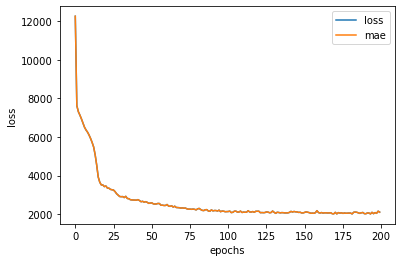

In [175]:
# Plot history (also known as a loss curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [176]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 1792.7042 - mae: 1792.7042


(1792.7042236328125, 1792.7042236328125)

## Callbacks, Early stopping

In [179]:

# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # 100 units
    tf.keras.layers.Dense(10),                      # 10 units
    tf.keras.layers.Dense(1)                        # 1 units (important for output)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(0.01),  # SGD doesn't work
                       metrics = ['mae'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


# Fit the model
history = insurance_model.fit(X_train, y_train, epochs = 200, callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 12255.0576 - mae: 12255.0576
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7624.7441 - mae: 7624.7441
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7308.0225 - mae: 7308.0225
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7133.7031 - mae: 7133.7031
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6938.4385 - mae: 6938.4385
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6718.6958 - mae: 6718.6958
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6508.7764 - mae: 6508.7764
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 6362.2778 - mae: 6362.2778
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 6248.7173 - mae: 6248.7173
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6098.0464 - mae: 6098.04

In [112]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1792.7042 - mae: 1792.7042


[1792.7042236328125, 1792.7042236328125]

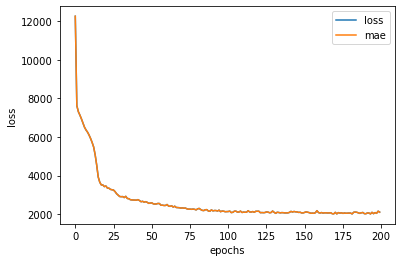

In [113]:
# Plot history (also known as a loss curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [114]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 1792.7042 - mae: 1792.7042


(1792.7042236328125, 1792.7042236328125)

## Preprocessing Data (normalization and standardization)

In [116]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [117]:
# Read the Insurance Dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [118]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
# Normalizing

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [120]:
# Create a Column Tranformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turns all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance['charges']

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random st


# Fit the column transformer to our training data
ct.fit(X_train)


# Transform training  and test data with normalization (MinMaxSCaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [123]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [137]:
# Build a Neural Network Model to fit on our Normalized Data

tf.random.set_seed(42)

# 1. Create the Model

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

# 2. Compile the Model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(0.01),
                         metrics = ["mae"])

# 3. Fit the Model
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13269.0762 - mae: 13269.0762
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 12005.4141 - mae: 12005.4141
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 8644.8701 - mae: 8644.8701
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7708.6387 - mae: 7708.6387
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 7299.9780 - mae: 7299.9780
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 6826.0718 - mae: 6826.0718
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 6138.2314 - mae: 6138.2314
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 5170.1060 - mae: 5170.1060
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 4159.4829 - mae: 4159.4829
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3687.2188 - mae: 3687.

34/34 [==============================] - 0s 5ms/step - loss: 1992.8566 - mae: 1992.8566
Epoch 163/200
34/34 [==============================] - 0s 5ms/step - loss: 1991.2303 - mae: 1991.2303
Epoch 164/200
34/34 [==============================] - 0s 5ms/step - loss: 1996.9760 - mae: 1996.9760
Epoch 165/200
34/34 [==============================] - 0s 7ms/step - loss: 2000.7638 - mae: 2000.7638
Epoch 166/200
34/34 [==============================] - 0s 3ms/step - loss: 1988.8538 - mae: 1988.8538
Epoch 167/200
34/34 [==============================] - 0s 6ms/step - loss: 1995.8566 - mae: 1995.8566
Epoch 168/200
34/34 [==============================] - 0s 5ms/step - loss: 2010.4659 - mae: 2010.4659
Epoch 169/200
34/34 [==============================] - 0s 3ms/step - loss: 1996.4203 - mae: 1996.4203
Epoch 170/200
34/34 [==============================] - 0s 3ms/step - loss: 1992.0399 - mae: 1992.0399
Epoch 171/200
34/34 [==============================] - 0s 4ms/step - loss: 1991.8888 - mae: 1991

In [138]:
# Evaluate our insurance model trained on Normalised Data

insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1737.9021 - mae: 1737.9021


[1737.902099609375, 1737.902099609375]

In [139]:
insurance_model_4.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 100)               1200      
                                                                 
 dense_56 (Dense)            (None, 10)                1010      
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
